<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_python/3_3_3_sarcasm_NLP_%EC%96%91%EB%B0%A9%ED%96%A5LSTM_Conv1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.3.3. sarcasm NLP : 양방향 LSTM추가와 Conv1D 비교

1) 양방향 LSTM

In [1]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

--2021-05-05 07:37:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.198.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2021-05-05 07:37:39 (111 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [2]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [3]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [5]:
num_epochs = 50
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
625/625 [==============================] - 70s 62ms/step - loss: 0.5409 - accuracy: 0.6996 - val_loss: 0.3945 - val_accuracy: 0.8196
Epoch 2/50
625/625 [==============================] - 37s 60ms/step - loss: 0.3589 - accuracy: 0.8318 - val_loss: 0.3734 - val_accuracy: 0.8287
Epoch 3/50
625/625 [==============================] - 37s 60ms/step - loss: 0.3173 - accuracy: 0.8619 - val_loss: 0.3681 - val_accuracy: 0.8363
Epoch 4/50
625/625 [==============================] - 37s 59ms/step - loss: 0.3033 - accuracy: 0.8639 - val_loss: 0.3689 - val_accuracy: 0.8334
Epoch 5/50
625/625 [==============================] - 37s 60ms/step - loss: 0.2888 - accuracy: 0.8708 - val_loss: 0.3944 - val_accuracy: 0.8258
Epoch 6/50
625/625 [==============================] - 37s 60ms/step - loss: 0.2795 - accuracy: 0.8776 - val_loss: 0.3937 - val_accuracy: 0.8243
Epoch 7/50
625/625 [==============================] - 37s 60ms/step - loss: 0.2744 - accuracy: 0.8812 - val_loss: 0.3811 - val_accuracy:

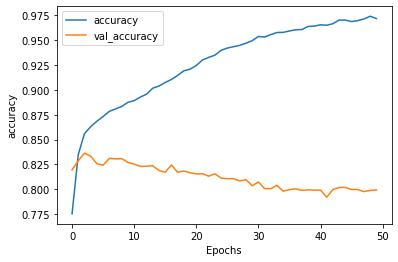

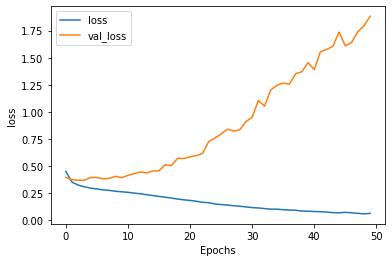

In [6]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
# model.save("test.h5")

2) Conv1D

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 50
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
625/625 [==============================] - 5s 6ms/step - loss: 0.5690 - accuracy: 0.6725 - val_loss: 0.4083 - val_accuracy: 0.8171
Epoch 2/50
625/625 [==============================] - 4s 6ms/step - loss: 0.3592 - accuracy: 0.8386 - val_loss: 0.3868 - val_accuracy: 0.8226
Epoch 3/50
625/625 [==============================] - 4s 6ms/step - loss: 0.3125 - accuracy: 0.8622 - val_loss: 0.3904 - val_accuracy: 0.8217
Epoch 4/50
625/625 [==============================] - 4s 6ms/step - loss: 0.2848 - accuracy: 0.8781 - val_loss: 0.4023 - val_accuracy: 0.8226
Epoch 5/50
625/625 [==============================] - 4s 6ms/step - loss: 0.2413 - accuracy: 0.9012 - val_loss: 0.4184 - val_accuracy: 0.8216
Epoch 6/50
625/625 [==============================] - 4s 6ms/step - loss: 0.2126 - accuracy: 0.9169 - val_loss: 0.4653 - val_accuracy: 0.8164
Epoch 7/50
625/625 [==============================] - 4s 6ms/step - loss: 0.1710 - accuracy: 0.9347 - val_loss: 0.4953 - val_accuracy: 0.8170
Epoch 

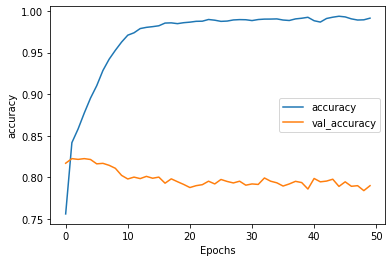

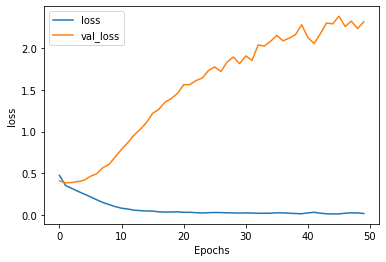

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
# model.save("test.h5")